In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mb

### Step 1: Import necessary dataframes for geosmin concentrations at Marston Reservoir - df_geosmin

In [2]:
#conduit 20 geosmin entries
conduit20_geosmin = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/conduit20_geosmin.csv')

#reservoir sampling geosmin entries
sample_res_geosmin = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/sample_res_geosmin.csv')

#water treatment plant samples
wtp_samples_geosmin = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/wtp_samples_geosmin.csv')

#water treatment plant influent geosmin entries
wtp_influent_geosmin = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/wtp_influent_geosmin.csv')

In [3]:
frames = [conduit20_geosmin, sample_res_geosmin, wtp_influent_geosmin, wtp_samples_geosmin]
df_geosmin = pd.concat(frames)

In [4]:
#check final dataframe for geosmin values
df_geosmin

,SAMPLE_NUMBER,SAMPLED_DATE,SAMPLE_NAME,SAMPLING_POINT_DESCRIPTION,SITE,FACILITY,ANALYTE,FORMATTED_ENTRY,UNITS,DEPTH
0,233240,2/4/2013 10:27,WS-LP-021,NaN,Conduit #20 at Marston Forebay Influent,Marston Forebay,Geosmin,2.14,ng/L,NaN
1,556579,4/22/2019 10:22,WS-LP-021,Conduit #20 at Marston Forebay Influent,Conduit #20 at Marston Forebay Influent,Marston Forebay,Geosmin,3.00,ng/L,NaN
2,558288,4/30/2019 11:35,WS-LP-021,Conduit #20 at Marston Forebay Influent,Conduit #20 at Marston Forebay Influent,Marston Forebay,Geosmin,4.00,ng/L,NaN
3,562497,5/7/2019 10:01,WS-LP-021,Conduit #20 at Marston Forebay Influent,Conduit #20 at Marston Forebay Influent,Marston Forebay,Geosmin,5.00,ng/L,NaN
4,564659,5/21/2019 8:26,WS-LP-021,Conduit #20 at Marston Forebay Influent,Conduit #20 at Marston Forebay Influent,Marston Forebay,Geosmin,4.00,ng/L,NaN
...,...,...,...,...,...,...,...,...,...,...
122,1088836,5/24/2022 9:32,PL-MAR-MLOWM,Marston WTP MLOW Mid,Marston WTP MLOW Mid,Marston WTP,Geosmin,2.00,ng/L,MLOWM
123,1114355,5/26/2022 15:22,PL-MAR-MLOWM-A-4,NaN,Marston WTP MLOW Mid,Marston WTP,Geosmin,3.00,ng/L,MLOWM
124,1088837,5/31/2022 9:01,PL-MAR-MLOWM,Marston WTP MLOW Mid,Marston WTP MLOW Mid,Marston WTP,Geosmin,3.00,ng/L,MLOWM
125,1119241,6/2/2022 9:07,PL-MAR-MLOWM-A-4,NaN,Marston WTP MLOW Mid,Marston WTP,Geosmin,3.00,ng/L,MLOWM


In [5]:
df_geosmin.to_csv('df_geosmin.csv', index=False)

### Step 2: Import necessary dataframes for nutrient information - df_full

In [6]:
ms_above_conf_nut = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/ms_above_conf_nut_filled.csv')
nf_above_conf_nut = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/nf_above_conf_nut_filled.csv')
downstream_strontia_nut = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/downstream_strontia_nut_filled.csv')
upstream_strontia_nut = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/upstream_strontia_nut_filled.csv')
sp_below_chat_nut = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/sp_below_chat_nut_filled.csv')

In [7]:
#reset indices to ease merging of dataframes
ms_above_conf_nut.reset_index(drop=True, inplace=True)
nf_above_conf_nut.reset_index(drop = True, inplace= True)
downstream_strontia_nut.reset_index(drop=True, inplace=True)
upstream_strontia_nut.reset_index(drop=True, inplace=True)
sp_below_chat_nut.reset_index(drop=True, inplace=True)

In [8]:
#concat is not working, use merge function as well
df_full = ms_above_conf_nut.merge(nf_above_conf_nut, on=['Date'], how='outer')

In [9]:
df_full = df_full.merge(downstream_strontia_nut, on=['Date'], how='outer')
df_full = df_full.merge(upstream_strontia_nut, on=['Date'], how='outer')
df_full = df_full.merge(sp_below_chat_nut, on=['Date'], how = 'outer')

In [10]:
df_full

,Date,"Adjusted TOC, MS Above Conf.","Adjusted TP, MS Above Conf.","Adjusted turbidity, MS Above Conf.","Adjusted TOC, NF Above Conf.","Adjusted TP, NF Above Conf.","Adjusted turbidity, NF Above Conf.","Adjusted TOC, Downstream Strontia","Adjusted TP, Downstream Strontia","Adjusted turbidity, Downstream Strontia","Adjusted TOC, Upstream Strontia","Adjusted TP, Upstream Strontia","Adjusted turbidity, Upstream Strontia","Adjusted TOC, SP Below Chatfield","Adjusted TP, SP Below Chatfield","Adjusted turbidity, SP Below Chatfield"
0,6/1/2012,2.500000,0.020339,0.200000,2.400000,0.025372,5.400000,3.600000,0.014000,3.100000,2.600000,0.036923,4.800000,2.400000,0.018248,1.900000
1,6/2/2012,2.490000,0.020785,0.215919,2.490371,0.025729,5.079161,3.596674,0.014214,3.048621,2.724654,0.036172,4.681894,2.409649,0.034451,1.812967
2,6/3/2012,2.480000,0.021241,0.233105,2.577822,0.026073,4.767159,3.592030,0.014425,2.997585,2.845739,0.035422,4.569135,2.421590,0.050192,1.731733
3,6/4/2012,2.470000,0.021707,0.251659,2.662342,0.026404,4.464138,3.586111,0.014634,2.946965,2.963209,0.034676,4.461630,2.435753,0.065465,1.656100
4,6/5/2012,2.460000,0.022183,0.271690,2.743922,0.026722,4.170241,3.578959,0.014840,2.896831,3.077017,0.033935,4.359282,2.452067,0.080263,1.585867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3678,6/27/2022,3.244595,0.023010,4.199058,2.979046,0.015812,6.014642,2.569160,0.017053,2.331630,3.020314,0.009394,5.715335,4.043297,0.069535,8.422129
3679,6/28/2022,3.233388,0.023254,4.386381,3.008835,0.015734,6.084747,2.525783,0.017285,2.284832,3.040042,0.009162,5.773119,4.044972,0.074167,8.679552
3680,6/29/2022,3.222220,0.023500,4.582062,3.038921,0.015655,6.155668,2.483140,0.017520,2.238974,3.059898,0.008936,5.831487,4.046647,0.079108,8.944844
3681,6/30/2022,3.211091,0.023749,4.786471,3.069309,0.015577,6.227416,2.441216,0.017758,2.194036,3.079884,0.008715,5.890446,4.048323,0.084379,9.218244


In [11]:
df_full.to_csv('df_full.csv',index = True)
df_full.to_excel('df_full.xlsx',index = True)

In [12]:
df_full.describe

<bound method NDFrame.describe of            Date  Adjusted TOC, MS Above Conf.  Adjusted TP, MS Above Conf.  \
0      6/1/2012                      2.500000                     0.020339   
1      6/2/2012                      2.490000                     0.020785   
2      6/3/2012                      2.480000                     0.021241   
3      6/4/2012                      2.470000                     0.021707   
4      6/5/2012                      2.460000                     0.022183   
...         ...                           ...                          ...   
3678  6/27/2022                      3.244595                     0.023010   
3679  6/28/2022                      3.233388                     0.023254   
3680  6/29/2022                      3.222220                     0.023500   
3681  6/30/2022                      3.211091                     0.023749   
3682        NaN                           NaN                          NaN   

      Adjusted turbidity, MS 

### Import dataframes for water temperature at locations and flow/air temperatures - df_flows_temp

In [13]:
#waterton gage data - flow rate and water temperature calculations
waterton_data = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/waterton_data.csv')

#cheesman and roberts tunnel data + strontia temp data
ch_rt_data = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/cheesman_roberts_flow_temp_data.csv')

#conduit 20 and marston reservoir data (flow, air temperature)
cond20_mar_data = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/marston_cond20_flow_temp_data.csv')


#water temp data from different points

#nf above confluence
nf_above_conf_temp = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/nf_above_conf_temp_filled.csv')

#ms above confluence
ms_above_conf_temp = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/ms_above_conf_temp_filled.csv')

#upstream strontia
upstream_strontia_temp = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/upstream_strontia_temp_filled.csv')

#downstream strontia
downstream_strontia_temp = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/downstream_strontia_temp_filled.csv')

#sp below chatfield
sp_below_chat_temp = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/sp_below_chat_temp_filled.csv')

In [14]:
#reset indices for the water temperature dataframes
ms_above_conf_temp.reset_index(drop=True, inplace=True)
nf_above_conf_temp.reset_index(drop=True, inplace=True)
upstream_strontia_temp.reset_index(drop=True, inplace=True)
downstream_strontia_temp.reset_index(drop=True, inplace=True)
sp_below_chat_temp.reset_index(drop=True, inplace=True)

In [15]:
#cleaning up names
nf_above_conf_temp = nf_above_conf_temp.rename(columns = {'Water Temp':'Water Temperature, NF above Confluence'})

In [16]:
ms_above_conf_temp = ms_above_conf_temp.rename(columns = {'Water Temp':'Water Temperature, MS above Confluence'})
upstream_strontia_temp = upstream_strontia_temp.rename(columns = {'Water Temp':'Water Temperature, Upstream Strontia'})
downstream_strontia_temp = downstream_strontia_temp.rename(columns = {'Water Temp':'Water Temperature, Downstream Strontia'})
sp_below_chat_temp = sp_below_chat_temp.rename(columns = {'Water Temp':'Water Temperature, SP Below Chatfield'})

In [17]:
#merging water temperature dataframes
df_water_temp = ms_above_conf_temp.merge(nf_above_conf_temp, on=['Date'], how='outer')

In [18]:
df_water_temp = df_water_temp.merge(upstream_strontia_temp, on = ['Date'], how = 'outer')
df_water_temp = df_water_temp.merge(downstream_strontia_temp, on = ['Date'], how = 'outer')
df_water_temp = df_water_temp.merge(sp_below_chat_temp, on = ['Date'], how = 'outer')

In [19]:
#final dataframe for water temperatures
df_water_temp

,Date,"Water Temperature, MS above Confluence","Water Temperature, NF above Confluence","Water Temperature, Upstream Strontia","Water Temperature, Downstream Strontia","Water Temperature, SP Below Chatfield"
0,6/1/2012,14.554844,8.586489,9.083256,15.358337,17.075902
1,6/2/2012,14.333172,8.872917,9.453704,15.236844,17.543801
2,6/3/2012,14.121086,9.148626,9.813862,15.117757,17.999793
3,6/4/2012,13.918585,9.413614,10.163730,15.001076,18.443879
4,6/5/2012,13.725671,9.667884,10.503308,14.886802,18.876058
...,...,...,...,...,...,...
3677,6/26/2022,14.239519,12.581977,12.237893,14.646480,21.242407
3678,6/27/2022,14.191289,12.565539,12.189940,14.716511,21.293677
3679,6/28/2022,14.143223,12.549122,12.142175,14.786877,21.345071
3680,6/29/2022,14.095320,12.532727,12.094597,14.857580,21.396590


In [20]:
df_final = df_full.merge(df_water_temp, on=['Date'], how = 'outer')

In [21]:
df_final

,Date,"Adjusted TOC, MS Above Conf.","Adjusted TP, MS Above Conf.","Adjusted turbidity, MS Above Conf.","Adjusted TOC, NF Above Conf.","Adjusted TP, NF Above Conf.","Adjusted turbidity, NF Above Conf.","Adjusted TOC, Downstream Strontia","Adjusted TP, Downstream Strontia","Adjusted turbidity, Downstream Strontia",...,"Adjusted TP, Upstream Strontia","Adjusted turbidity, Upstream Strontia","Adjusted TOC, SP Below Chatfield","Adjusted TP, SP Below Chatfield","Adjusted turbidity, SP Below Chatfield","Water Temperature, MS above Confluence","Water Temperature, NF above Confluence","Water Temperature, Upstream Strontia","Water Temperature, Downstream Strontia","Water Temperature, SP Below Chatfield"
0,6/1/2012,2.500000,0.020339,0.200000,2.400000,0.025372,5.400000,3.600000,0.014000,3.100000,...,0.036923,4.800000,2.400000,0.018248,1.900000,14.554844,8.586489,9.083256,15.358337,17.075902
1,6/2/2012,2.490000,0.020785,0.215919,2.490371,0.025729,5.079161,3.596674,0.014214,3.048621,...,0.036172,4.681894,2.409649,0.034451,1.812967,14.333172,8.872917,9.453704,15.236844,17.543801
2,6/3/2012,2.480000,0.021241,0.233105,2.577822,0.026073,4.767159,3.592030,0.014425,2.997585,...,0.035422,4.569135,2.421590,0.050192,1.731733,14.121086,9.148626,9.813862,15.117757,17.999793
3,6/4/2012,2.470000,0.021707,0.251659,2.662342,0.026404,4.464138,3.586111,0.014634,2.946965,...,0.034676,4.461630,2.435753,0.065465,1.656100,13.918585,9.413614,10.163730,15.001076,18.443879
4,6/5/2012,2.460000,0.022183,0.271690,2.743922,0.026722,4.170241,3.578959,0.014840,2.896831,...,0.033935,4.359282,2.452067,0.080263,1.585867,13.725671,9.667884,10.503308,14.886802,18.876058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3678,6/27/2022,3.244595,0.023010,4.199058,2.979046,0.015812,6.014642,2.569160,0.017053,2.331630,...,0.009394,5.715335,4.043297,0.069535,8.422129,14.191289,12.565539,12.189940,14.716511,21.293677
3679,6/28/2022,3.233388,0.023254,4.386381,3.008835,0.015734,6.084747,2.525783,0.017285,2.284832,...,0.009162,5.773119,4.044972,0.074167,8.679552,14.143223,12.549122,12.142175,14.786877,21.345071
3680,6/29/2022,3.222220,0.023500,4.582062,3.038921,0.015655,6.155668,2.483140,0.017520,2.238974,...,0.008936,5.831487,4.046647,0.079108,8.944844,14.095320,12.532727,12.094597,14.857580,21.396590
3681,6/30/2022,3.211091,0.023749,4.786471,3.069309,0.015577,6.227416,2.441216,0.017758,2.194036,...,0.008715,5.890446,4.048323,0.084379,9.218244,14.047579,12.516353,12.047206,14.928620,21.448233


## Import datafiles for flow and air temperatures

In [22]:
#merge different datasets
df_flows_temp = waterton_data.merge(ch_rt_data, on=['Date '], how='outer')
df_flows_temp = df_flows_temp.merge(cond20_mar_data, on = ['Date '], how = 'outer')

In [23]:
ch_rt_data

,Date,South Platte Above Cheesman Flowrate (cfs),South Platte Below Cheesman Downstream (cfs),"Cheesman Air Temperature, Low (C)","Water Temperature, Cheesman, low (C)","Cheesman Air Temperature, High (C)","Water Temperature, Cheesman, high (C)",Roberts Tunnel Flowrate (cfs),"Strontia Springs Temperature, high (C)","Strontia Springs Temperature, low (C)"
0,6/1/2012,125.0,225.0,9.444444,10.971844,25.555556,19.455956,261.250000,26.111111,7.222222
1,6/2/2012,123.0,225.0,8.888889,10.679289,27.777778,20.626178,261.250000,26.666667,7.222222
2,6/3/2012,121.0,225.0,9.444444,10.971844,28.333333,20.918733,261.250000,28.888889,11.666667
3,6/4/2012,125.0,225.0,10.555556,11.556956,28.333333,20.918733,245.100000,28.888889,11.666667
4,6/5/2012,130.0,225.0,10.000000,11.264400,24.444444,18.870844,216.679167,27.777778,13.888889
...,...,...,...,...,...,...,...,...,...,...
3677,6/26/2022,114.0,77.6,9.444444,10.971844,20.000000,16.530400,327.666700,28.333333,11.666667
3678,6/27/2022,142.0,77.2,-17.777778,-3.363378,8.888889,10.679289,380.708300,31.666667,13.333333
3679,6/28/2022,161.0,76.9,11.666667,12.142067,30.000000,21.796400,388.750000,31.111111,13.333333
3680,6/29/2022,163.0,77.0,13.888889,13.312289,28.333333,20.918733,388.875000,24.444444,9.444444


In [24]:
df_flows_temp = df_flows_temp.dropna(subset = ['South Platte Below Cheesman Downstream (cfs) '])

In [25]:
df_flows_temp

,Date,Waterton Gage (cfs),"Temp Ch, C (high)","Chatfield, Low Temp (C)","Waterton Gage, High Water Temp (C)","Waterton Gage, Low Water Temp (C)",South Platte Above Cheesman Flowrate (cfs),South Platte Below Cheesman Downstream (cfs),"Cheesman Air Temperature, Low (C)","Water Temperature, Cheesman, low (C)",...,"Water Temperature, Cheesman, high (C)",Roberts Tunnel Flowrate (cfs),"Strontia Springs Temperature, high (C)","Strontia Springs Temperature, low (C)",Conduit 20 to Marston Total (No Chatfield water),Conduit 20 (with Chatfield flow) (cfs),Marston WTP Outflow (cfs),Strontia Springs Outflow (cfs),"Marston Temperature, high (C)","Marston Temperature, low (C)"
0,6/1/2012,47.4,27.8,10.0,19.65216,9.04870,125.0,225.0,9.444444,10.971844,...,19.455956,261.250000,26.111111,7.222222,43.80,63.80,77.35,97.00,22.777778,8.333333
1,6/2/2012,47.9,27.8,12.8,19.65216,10.71666,123.0,225.0,8.888889,10.679289,...,20.626178,261.250000,26.666667,7.222222,43.80,63.80,77.35,97.00,27.222222,11.111111
2,6/3/2012,47.4,31.1,12.2,21.61797,10.35924,121.0,225.0,9.444444,10.971844,...,20.918733,261.250000,28.888889,11.666667,45.60,65.60,77.35,96.05,23.888889,10.555556
3,6/4/2012,45.4,32.2,17.2,22.27324,13.33774,125.0,225.0,10.555556,11.556956,...,20.918733,245.100000,28.888889,11.666667,42.94,62.94,77.35,95.91,31.111111,13.888889
4,6/5/2012,45.3,28.3,16.7,19.95001,13.03989,130.0,225.0,10.000000,11.264400,...,18.870844,216.679167,27.777778,13.888889,43.65,63.65,77.35,96.18,31.666667,15.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677,6/26/2022,179.0,19.4,11.1,14.64828,9.70397,114.0,77.6,9.444444,10.971844,...,16.530400,327.666700,28.333333,11.666667,112.58,112.58,67.20,295.00,18.333333,12.222222
3678,6/27/2022,157.0,30.6,12.2,21.32012,10.35924,142.0,77.2,-17.777778,-3.363378,...,10.679289,380.708300,31.666667,13.333333,86.66,86.66,61.87,244.00,18.333333,11.111111
3679,6/28/2022,151.0,33.9,11.1,23.28593,9.70397,161.0,76.9,11.666667,12.142067,...,21.796400,388.750000,31.111111,13.333333,81.65,81.65,73.82,235.00,28.888889,12.222222
3680,6/29/2022,152.0,32.8,16.1,22.63066,12.68247,163.0,77.0,13.888889,13.312289,...,20.918733,388.875000,24.444444,9.444444,81.64,81.64,68.95,234.00,32.777778,16.666667


In [26]:
df_flows_temp = df_flows_temp.rename(columns = {'Date ':'Date'})

In [27]:
ch_rt_data

,Date,South Platte Above Cheesman Flowrate (cfs),South Platte Below Cheesman Downstream (cfs),"Cheesman Air Temperature, Low (C)","Water Temperature, Cheesman, low (C)","Cheesman Air Temperature, High (C)","Water Temperature, Cheesman, high (C)",Roberts Tunnel Flowrate (cfs),"Strontia Springs Temperature, high (C)","Strontia Springs Temperature, low (C)"
0,6/1/2012,125.0,225.0,9.444444,10.971844,25.555556,19.455956,261.250000,26.111111,7.222222
1,6/2/2012,123.0,225.0,8.888889,10.679289,27.777778,20.626178,261.250000,26.666667,7.222222
2,6/3/2012,121.0,225.0,9.444444,10.971844,28.333333,20.918733,261.250000,28.888889,11.666667
3,6/4/2012,125.0,225.0,10.555556,11.556956,28.333333,20.918733,245.100000,28.888889,11.666667
4,6/5/2012,130.0,225.0,10.000000,11.264400,24.444444,18.870844,216.679167,27.777778,13.888889
...,...,...,...,...,...,...,...,...,...,...
3677,6/26/2022,114.0,77.6,9.444444,10.971844,20.000000,16.530400,327.666700,28.333333,11.666667
3678,6/27/2022,142.0,77.2,-17.777778,-3.363378,8.888889,10.679289,380.708300,31.666667,13.333333
3679,6/28/2022,161.0,76.9,11.666667,12.142067,30.000000,21.796400,388.750000,31.111111,13.333333
3680,6/29/2022,163.0,77.0,13.888889,13.312289,28.333333,20.918733,388.875000,24.444444,9.444444


In [28]:
df_final = df_final.rename(columns = {'Date ':'Date'})

In [29]:
df_final = df_final.merge(df_flows_temp, on = ['Date'], how = 'outer')

In [30]:
df_final

,Date,"Adjusted TOC, MS Above Conf.","Adjusted TP, MS Above Conf.","Adjusted turbidity, MS Above Conf.","Adjusted TOC, NF Above Conf.","Adjusted TP, NF Above Conf.","Adjusted turbidity, NF Above Conf.","Adjusted TOC, Downstream Strontia","Adjusted TP, Downstream Strontia","Adjusted turbidity, Downstream Strontia",...,"Water Temperature, Cheesman, high (C)",Roberts Tunnel Flowrate (cfs),"Strontia Springs Temperature, high (C)","Strontia Springs Temperature, low (C)",Conduit 20 to Marston Total (No Chatfield water),Conduit 20 (with Chatfield flow) (cfs),Marston WTP Outflow (cfs),Strontia Springs Outflow (cfs),"Marston Temperature, high (C)","Marston Temperature, low (C)"
0,6/1/2012,2.500000,0.020339,0.200000,2.400000,0.025372,5.400000,3.600000,0.014000,3.100000,...,19.455956,261.250000,26.111111,7.222222,43.80,63.80,77.35,97.00,22.777778,8.333333
1,6/2/2012,2.490000,0.020785,0.215919,2.490371,0.025729,5.079161,3.596674,0.014214,3.048621,...,20.626178,261.250000,26.666667,7.222222,43.80,63.80,77.35,97.00,27.222222,11.111111
2,6/3/2012,2.480000,0.021241,0.233105,2.577822,0.026073,4.767159,3.592030,0.014425,2.997585,...,20.918733,261.250000,28.888889,11.666667,45.60,65.60,77.35,96.05,23.888889,10.555556
3,6/4/2012,2.470000,0.021707,0.251659,2.662342,0.026404,4.464138,3.586111,0.014634,2.946965,...,20.918733,245.100000,28.888889,11.666667,42.94,62.94,77.35,95.91,31.111111,13.888889
4,6/5/2012,2.460000,0.022183,0.271690,2.743922,0.026722,4.170241,3.578959,0.014840,2.896831,...,18.870844,216.679167,27.777778,13.888889,43.65,63.65,77.35,96.18,31.666667,15.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3678,6/27/2022,3.244595,0.023010,4.199058,2.979046,0.015812,6.014642,2.569160,0.017053,2.331630,...,10.679289,380.708300,31.666667,13.333333,86.66,86.66,61.87,244.00,18.333333,11.111111
3679,6/28/2022,3.233388,0.023254,4.386381,3.008835,0.015734,6.084747,2.525783,0.017285,2.284832,...,21.796400,388.750000,31.111111,13.333333,81.65,81.65,73.82,235.00,28.888889,12.222222
3680,6/29/2022,3.222220,0.023500,4.582062,3.038921,0.015655,6.155668,2.483140,0.017520,2.238974,...,20.918733,388.875000,24.444444,9.444444,81.64,81.64,68.95,234.00,32.777778,16.666667
3681,6/30/2022,3.211091,0.023749,4.786471,3.069309,0.015577,6.227416,2.441216,0.017758,2.194036,...,18.285733,388.875000,23.888889,9.444444,81.76,81.76,61.64,322.00,32.222222,17.222222


## Final Dataframe = df_final

In [31]:
#FINAL DATAFRAME
df_final

,Date,"Adjusted TOC, MS Above Conf.","Adjusted TP, MS Above Conf.","Adjusted turbidity, MS Above Conf.","Adjusted TOC, NF Above Conf.","Adjusted TP, NF Above Conf.","Adjusted turbidity, NF Above Conf.","Adjusted TOC, Downstream Strontia","Adjusted TP, Downstream Strontia","Adjusted turbidity, Downstream Strontia",...,"Water Temperature, Cheesman, high (C)",Roberts Tunnel Flowrate (cfs),"Strontia Springs Temperature, high (C)","Strontia Springs Temperature, low (C)",Conduit 20 to Marston Total (No Chatfield water),Conduit 20 (with Chatfield flow) (cfs),Marston WTP Outflow (cfs),Strontia Springs Outflow (cfs),"Marston Temperature, high (C)","Marston Temperature, low (C)"
0,6/1/2012,2.500000,0.020339,0.200000,2.400000,0.025372,5.400000,3.600000,0.014000,3.100000,...,19.455956,261.250000,26.111111,7.222222,43.80,63.80,77.35,97.00,22.777778,8.333333
1,6/2/2012,2.490000,0.020785,0.215919,2.490371,0.025729,5.079161,3.596674,0.014214,3.048621,...,20.626178,261.250000,26.666667,7.222222,43.80,63.80,77.35,97.00,27.222222,11.111111
2,6/3/2012,2.480000,0.021241,0.233105,2.577822,0.026073,4.767159,3.592030,0.014425,2.997585,...,20.918733,261.250000,28.888889,11.666667,45.60,65.60,77.35,96.05,23.888889,10.555556
3,6/4/2012,2.470000,0.021707,0.251659,2.662342,0.026404,4.464138,3.586111,0.014634,2.946965,...,20.918733,245.100000,28.888889,11.666667,42.94,62.94,77.35,95.91,31.111111,13.888889
4,6/5/2012,2.460000,0.022183,0.271690,2.743922,0.026722,4.170241,3.578959,0.014840,2.896831,...,18.870844,216.679167,27.777778,13.888889,43.65,63.65,77.35,96.18,31.666667,15.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3678,6/27/2022,3.244595,0.023010,4.199058,2.979046,0.015812,6.014642,2.569160,0.017053,2.331630,...,10.679289,380.708300,31.666667,13.333333,86.66,86.66,61.87,244.00,18.333333,11.111111
3679,6/28/2022,3.233388,0.023254,4.386381,3.008835,0.015734,6.084747,2.525783,0.017285,2.284832,...,21.796400,388.750000,31.111111,13.333333,81.65,81.65,73.82,235.00,28.888889,12.222222
3680,6/29/2022,3.222220,0.023500,4.582062,3.038921,0.015655,6.155668,2.483140,0.017520,2.238974,...,20.918733,388.875000,24.444444,9.444444,81.64,81.64,68.95,234.00,32.777778,16.666667
3681,6/30/2022,3.211091,0.023749,4.786471,3.069309,0.015577,6.227416,2.441216,0.017758,2.194036,...,18.285733,388.875000,23.888889,9.444444,81.76,81.76,61.64,322.00,32.222222,17.222222


In [32]:
#drop rows with not full information
df_final = df_final.dropna(subset = ['Cheesman Air Temperature, High (C)'])

In [33]:
df_final

,Date,"Adjusted TOC, MS Above Conf.","Adjusted TP, MS Above Conf.","Adjusted turbidity, MS Above Conf.","Adjusted TOC, NF Above Conf.","Adjusted TP, NF Above Conf.","Adjusted turbidity, NF Above Conf.","Adjusted TOC, Downstream Strontia","Adjusted TP, Downstream Strontia","Adjusted turbidity, Downstream Strontia",...,"Water Temperature, Cheesman, high (C)",Roberts Tunnel Flowrate (cfs),"Strontia Springs Temperature, high (C)","Strontia Springs Temperature, low (C)",Conduit 20 to Marston Total (No Chatfield water),Conduit 20 (with Chatfield flow) (cfs),Marston WTP Outflow (cfs),Strontia Springs Outflow (cfs),"Marston Temperature, high (C)","Marston Temperature, low (C)"
0,6/1/2012,2.500000,0.020339,0.200000,2.400000,0.025372,5.400000,3.600000,0.014000,3.100000,...,19.455956,261.250000,26.111111,7.222222,43.80,63.80,77.35,97.00,22.777778,8.333333
1,6/2/2012,2.490000,0.020785,0.215919,2.490371,0.025729,5.079161,3.596674,0.014214,3.048621,...,20.626178,261.250000,26.666667,7.222222,43.80,63.80,77.35,97.00,27.222222,11.111111
2,6/3/2012,2.480000,0.021241,0.233105,2.577822,0.026073,4.767159,3.592030,0.014425,2.997585,...,20.918733,261.250000,28.888889,11.666667,45.60,65.60,77.35,96.05,23.888889,10.555556
3,6/4/2012,2.470000,0.021707,0.251659,2.662342,0.026404,4.464138,3.586111,0.014634,2.946965,...,20.918733,245.100000,28.888889,11.666667,42.94,62.94,77.35,95.91,31.111111,13.888889
4,6/5/2012,2.460000,0.022183,0.271690,2.743922,0.026722,4.170241,3.578959,0.014840,2.896831,...,18.870844,216.679167,27.777778,13.888889,43.65,63.65,77.35,96.18,31.666667,15.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677,6/26/2022,3.255840,0.022769,4.019734,2.949552,0.015891,5.945346,2.613281,0.016824,2.379386,...,16.530400,327.666700,28.333333,11.666667,112.58,112.58,67.20,295.00,18.333333,12.222222
3678,6/27/2022,3.244595,0.023010,4.199058,2.979046,0.015812,6.014642,2.569160,0.017053,2.331630,...,10.679289,380.708300,31.666667,13.333333,86.66,86.66,61.87,244.00,18.333333,11.111111
3679,6/28/2022,3.233388,0.023254,4.386381,3.008835,0.015734,6.084747,2.525783,0.017285,2.284832,...,21.796400,388.750000,31.111111,13.333333,81.65,81.65,73.82,235.00,28.888889,12.222222
3680,6/29/2022,3.222220,0.023500,4.582062,3.038921,0.015655,6.155668,2.483140,0.017520,2.238974,...,20.918733,388.875000,24.444444,9.444444,81.64,81.64,68.95,234.00,32.777778,16.666667


In [34]:
df_final['Adjusted TP, MS Above Conf.'] = df_final['Adjusted TP, MS Above Conf.'] + 1
df_final['Adjusted turbidity, MS Above Conf.'] = df_final['Adjusted turbidity, MS Above Conf.'] + 1
df_final['Adjusted TP, NF Above Conf.'] = df_final['Adjusted TP, NF Above Conf.'] + 1
df_final['Adjusted turbidity, NF Above Conf.'] = df_final['Adjusted turbidity, NF Above Conf.'] + 1.5
df_final['Adjusted TP, Downstream Strontia'] = df_final['Adjusted TP, Downstream Strontia'] + 1
df_final['Adjusted turbidity, Downstream Strontia'] = df_final['Adjusted turbidity, Downstream Strontia'] + 1.437
df_final['Adjusted TP, Upstream Strontia'] = df_final['Adjusted TP, Upstream Strontia'] + 1
df_final['Adjusted turbidity, Upstream Strontia'] = df_final['Adjusted turbidity, Upstream Strontia'] + 1
df_final['Adjusted TP, SP Below Chatfield'] = df_final['Adjusted TP, SP Below Chatfield'] + 1
df_final['Adjusted turbidity, SP Below Chatfield'] = df_final['Adjusted turbidity, SP Below Chatfield'] + 2.5

/var/folders/fv/w_4_6lgj0pg873rfkcnj0z7c0000gn/T/ipykernel_16962/2573869945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Adjusted TP, MS Above Conf.'] = df_final['Adjusted TP, MS Above Conf.'] + 1
/var/folders/fv/w_4_6lgj0pg873rfkcnj0z7c0000gn/T/ipykernel_16962/2573869945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Adjusted turbidity, MS Above Conf.'] = df_final['Adjusted turbidity, MS Above Conf.'] + 1
/var/folders/fv/w_4_6lgj0pg873rfkcnj0z7c0000gn/T/ipykernel_16962/25738

In [35]:
#done to account of mis-inputs of flows 

df_final['Conduit 20 (with Chatfield flow) (cfs)'] = df_final['Conduit 20 (with Chatfield flow) (cfs)'] + 0.09
df_final['Marston WTP Outflow (cfs)'] = df_final['Marston WTP Outflow (cfs)'] + 4.51
df_final['Conduit 20 to Marston Total (No Chatfield water) '] = df_final['Conduit 20 to Marston Total (No Chatfield water) '] + 0.09
df_final['Roberts Tunnel Flowrate (cfs)'] = df_final['Roberts Tunnel Flowrate (cfs)'] + 2

/var/folders/fv/w_4_6lgj0pg873rfkcnj0z7c0000gn/T/ipykernel_16962/761340782.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Conduit 20 (with Chatfield flow) (cfs)'] = df_final['Conduit 20 (with Chatfield flow) (cfs)'] + 0.09
/var/folders/fv/w_4_6lgj0pg873rfkcnj0z7c0000gn/T/ipykernel_16962/761340782.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Marston WTP Outflow (cfs)'] = df_final['Marston WTP Outflow (cfs)'] + 4.51
/var/folders/fv/w_4_6lgj0pg873rfkcnj0z7c0000gn/T/ipykernel_169

In [36]:
df_final

,Date,"Adjusted TOC, MS Above Conf.","Adjusted TP, MS Above Conf.","Adjusted turbidity, MS Above Conf.","Adjusted TOC, NF Above Conf.","Adjusted TP, NF Above Conf.","Adjusted turbidity, NF Above Conf.","Adjusted TOC, Downstream Strontia","Adjusted TP, Downstream Strontia","Adjusted turbidity, Downstream Strontia",...,"Water Temperature, Cheesman, high (C)",Roberts Tunnel Flowrate (cfs),"Strontia Springs Temperature, high (C)","Strontia Springs Temperature, low (C)",Conduit 20 to Marston Total (No Chatfield water),Conduit 20 (with Chatfield flow) (cfs),Marston WTP Outflow (cfs),Strontia Springs Outflow (cfs),"Marston Temperature, high (C)","Marston Temperature, low (C)"
0,6/1/2012,2.500000,1.020339,1.200000,2.400000,1.025372,6.900000,3.600000,1.014000,4.537000,...,19.455956,263.250000,26.111111,7.222222,43.89,63.89,81.86,97.00,22.777778,8.333333
1,6/2/2012,2.490000,1.020785,1.215919,2.490371,1.025729,6.579161,3.596674,1.014214,4.485621,...,20.626178,263.250000,26.666667,7.222222,43.89,63.89,81.86,97.00,27.222222,11.111111
2,6/3/2012,2.480000,1.021241,1.233105,2.577822,1.026073,6.267159,3.592030,1.014425,4.434585,...,20.918733,263.250000,28.888889,11.666667,45.69,65.69,81.86,96.05,23.888889,10.555556
3,6/4/2012,2.470000,1.021707,1.251659,2.662342,1.026404,5.964138,3.586111,1.014634,4.383965,...,20.918733,247.100000,28.888889,11.666667,43.03,63.03,81.86,95.91,31.111111,13.888889
4,6/5/2012,2.460000,1.022183,1.271690,2.743922,1.026722,5.670241,3.578959,1.014840,4.333831,...,18.870844,218.679167,27.777778,13.888889,43.74,63.74,81.86,96.18,31.666667,15.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677,6/26/2022,3.255840,1.022769,5.019734,2.949552,1.015891,7.445346,2.613281,1.016824,3.816386,...,16.530400,329.666700,28.333333,11.666667,112.67,112.67,71.71,295.00,18.333333,12.222222
3678,6/27/2022,3.244595,1.023010,5.199058,2.979046,1.015812,7.514642,2.569160,1.017053,3.768630,...,10.679289,382.708300,31.666667,13.333333,86.75,86.75,66.38,244.00,18.333333,11.111111
3679,6/28/2022,3.233388,1.023254,5.386381,3.008835,1.015734,7.584747,2.525783,1.017285,3.721832,...,21.796400,390.750000,31.111111,13.333333,81.74,81.74,78.33,235.00,28.888889,12.222222
3680,6/29/2022,3.222220,1.023500,5.582062,3.038921,1.015655,7.655668,2.483140,1.017520,3.675974,...,20.918733,390.875000,24.444444,9.444444,81.73,81.73,73.46,234.00,32.777778,16.666667


## Fix the geosmin dataframe to spit out dates properly

In [37]:
df_geosmin_updated = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/df_geosmin_updated.csv')

In [38]:
df_geosmin_updated.reset_index(drop=True, inplace=True)

In [39]:
df_geosmin_updated

,SAMPLE_NUMBER,SAMPLED_DATE,SAMPLE_NAME,SAMPLING_POINT_DESCRIPTION,SITE,FACILITY,ANALYTE,FORMATTED_ENTRY,UNITS,DEPTH,Target,Date,Time
0,233240,2/4/2013 10:27,WS-LP-021,NaN,Conduit #20 at Marston Forebay Influent,Marston Forebay,Geosmin,2.14,ng/L,NaN,FRBY,2/4/2013,10:27:00
1,556579,4/22/2019 10:22,WS-LP-021,Conduit #20 at Marston Forebay Influent,Conduit #20 at Marston Forebay Influent,Marston Forebay,Geosmin,3.00,ng/L,NaN,FRBY,4/22/2019,10:22:00
2,558288,4/30/2019 11:35,WS-LP-021,Conduit #20 at Marston Forebay Influent,Conduit #20 at Marston Forebay Influent,Marston Forebay,Geosmin,4.00,ng/L,NaN,FRBY,4/30/2019,11:35:00
3,562497,5/7/2019 10:01,WS-LP-021,Conduit #20 at Marston Forebay Influent,Conduit #20 at Marston Forebay Influent,Marston Forebay,Geosmin,5.00,ng/L,NaN,FRBY,5/7/2019,10:01:00
4,564659,5/21/2019 8:26,WS-LP-021,Conduit #20 at Marston Forebay Influent,Conduit #20 at Marston Forebay Influent,Marston Forebay,Geosmin,4.00,ng/L,NaN,FRBY,5/21/2019,8:26:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,1088836,5/24/2022 9:32,PL-MAR-MLOWM,Marston WTP MLOW Mid,Marston WTP MLOW Mid,Marston WTP,Geosmin,2.00,ng/L,NaN,MLOWM,5/24/2022,9:32:00
633,1114355,5/26/2022 15:22,PL-MAR-MLOWM-A-4,NaN,Marston WTP MLOW Mid,Marston WTP,Geosmin,3.00,ng/L,4,MLOWM,5/26/2022,15:22:00
634,1088837,5/31/2022 9:01,PL-MAR-MLOWM,Marston WTP MLOW Mid,Marston WTP MLOW Mid,Marston WTP,Geosmin,3.00,ng/L,NaN,MLOWM,5/31/2022,9:01:00
635,1119241,6/2/2022 9:07,PL-MAR-MLOWM-A-4,NaN,Marston WTP MLOW Mid,Marston WTP,Geosmin,3.00,ng/L,4,MLOWM,6/2/2022,9:07:00


In [40]:
#make copy of predictor variable dataframe
df_final_copy = df_final.copy()

In [41]:
df_final_copy.dtypes

Date                                                  object
Adjusted TOC, MS Above Conf.                         float64
Adjusted TP, MS Above Conf.                          float64
Adjusted turbidity, MS Above Conf.                   float64
Adjusted TOC, NF Above Conf.                         float64
Adjusted TP, NF Above Conf.                          float64
Adjusted turbidity, NF Above Conf.                   float64
Adjusted TOC, Downstream Strontia                    float64
Adjusted TP, Downstream Strontia                     float64
Adjusted turbidity, Downstream Strontia              float64
Adjusted TOC, Upstream Strontia                      float64
Adjusted TP, Upstream Strontia                       float64
Adjusted turbidity, Upstream Strontia                float64
Adjusted TOC, SP Below Chatfield                     float64
Adjusted TP, SP Below Chatfield                      float64
Adjusted turbidity, SP Below Chatfield               float64
Water Temperature, MS ab

In [42]:
df_final = df_final.set_index(['Date'])

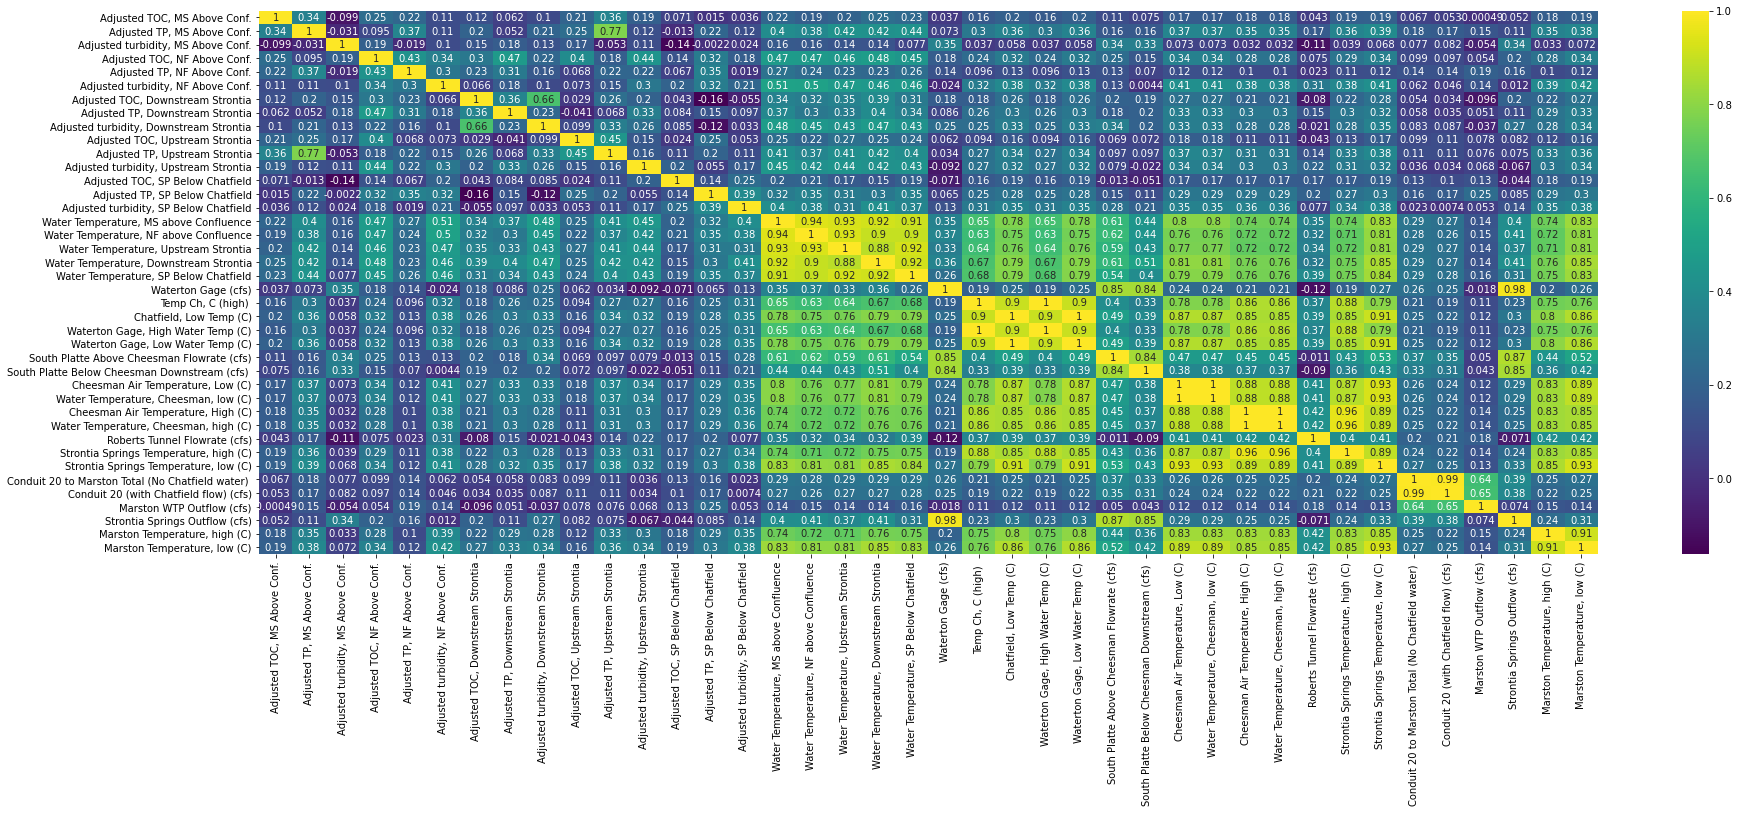

In [43]:
corrl = df_final.corr()

import matplotlib.pyplot as plt

plt.figure(figsize = (30,10))
ax = sb.heatmap(corrl,cmap='viridis',annot = True)

In [44]:
#drop columns from above based on correlation matrix 
df_final = df_final.drop(columns = ['Water Temperature, MS above Confluence','Water Temperature, NF above Confluence','Water Temperature, Upstream Strontia','Water Temperature, Downstream Strontia','Water Temperature, SP Below Chatfield','Temp Ch, C (high) ','Chatfield, Low Temp (C)','Waterton Gage, High Water Temp (C)','Waterton Gage, Low Water Temp (C)','Cheesman Air Temperature, Low (C)','Water Temperature, Cheesman, low (C)','Cheesman Air Temperature, High (C)','Water Temperature, Cheesman, high (C)','Strontia Springs Temperature, high (C)','Strontia Springs Temperature, low (C)'])

<AxesSubplot:>

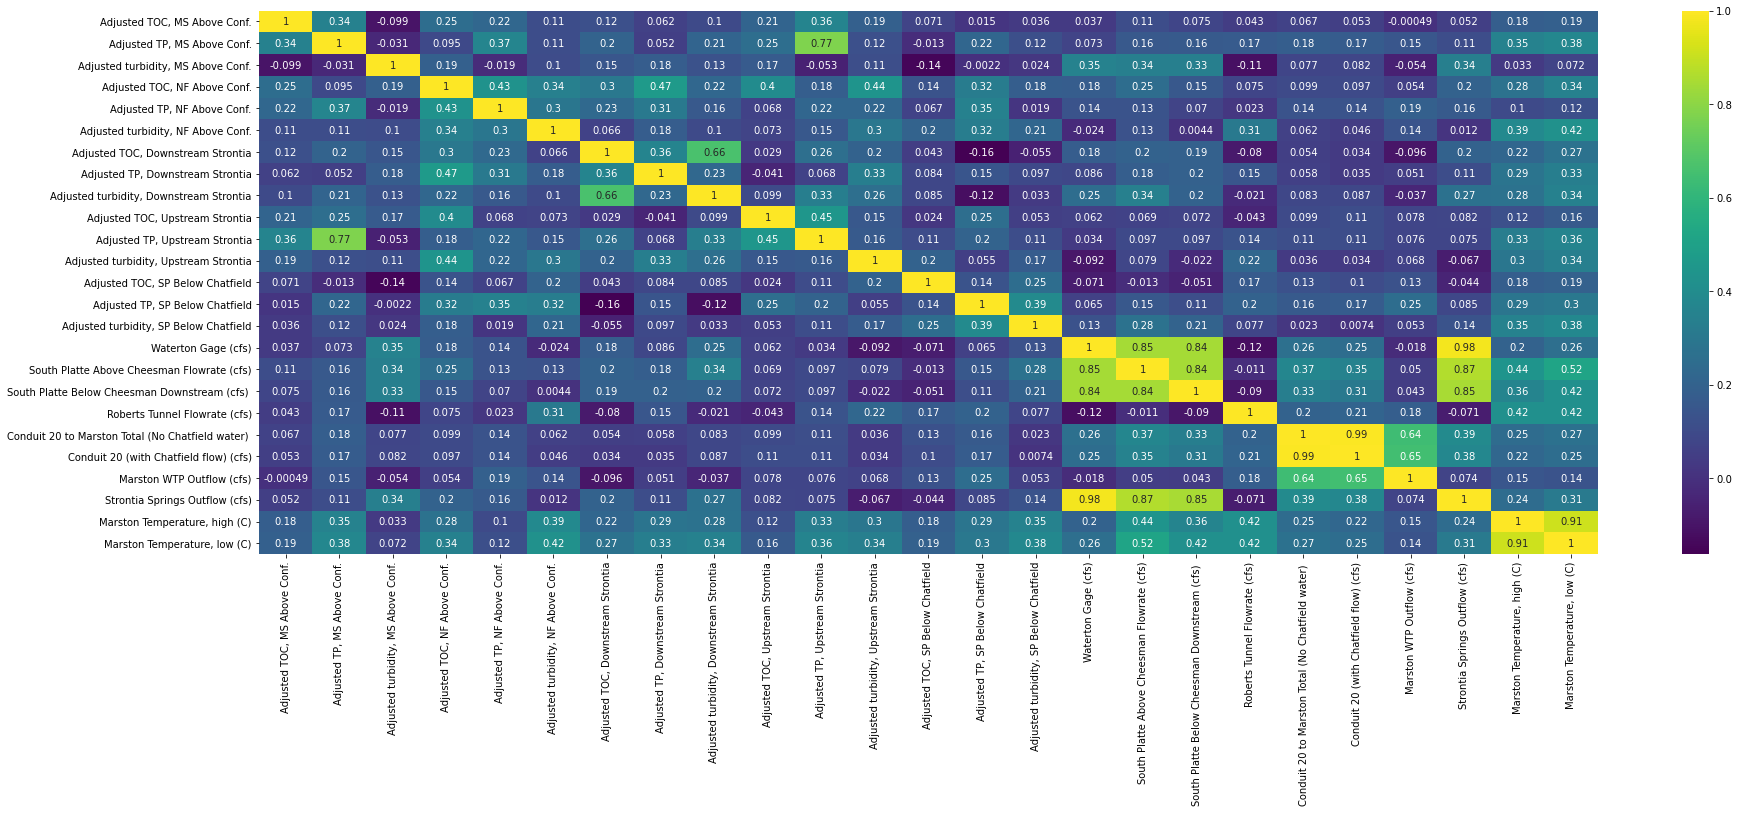

In [45]:
#new correlation matrix
corrl = df_final.corr()

plt.figure(figsize = (30,10))
sb.heatmap(corrl,cmap='viridis',annot = True)

In [62]:
#create the linear regression
df_final_copy = df_final

In [63]:
#merge with df_geosmin_updated to only get values from dates
result = pd.merge(df_final_copy, df_geosmin_updated, on= "Date")

#cleaning of result
result = result.drop(columns = ['SAMPLE_NUMBER','SAMPLING_POINT_DESCRIPTION','SITE','ANALYTE','Time','FACILITY','SAMPLED_DATE'])

In [64]:
result = result.set_index(['Date'])

In [65]:
result = result.drop(columns = ['SAMPLE_NAME','UNITS','DEPTH','Target'])

In [66]:
result

,"Adjusted TOC, MS Above Conf.","Adjusted TP, MS Above Conf.","Adjusted turbidity, MS Above Conf.","Adjusted TOC, NF Above Conf.","Adjusted TP, NF Above Conf.","Adjusted turbidity, NF Above Conf.","Adjusted TOC, Downstream Strontia","Adjusted TP, Downstream Strontia","Adjusted turbidity, Downstream Strontia","Adjusted TOC, Upstream Strontia",...,South Platte Above Cheesman Flowrate (cfs),South Platte Below Cheesman Downstream (cfs),Roberts Tunnel Flowrate (cfs),Conduit 20 to Marston Total (No Chatfield water),Conduit 20 (with Chatfield flow) (cfs),Marston WTP Outflow (cfs),Strontia Springs Outflow (cfs),"Marston Temperature, high (C)","Marston Temperature, low (C)",FORMATTED_ENTRY
Date,,,,,,,,,,,,,,,,,,,,,
7/2/2012,2.220000,1.037846,2.914504,3.796466,1.030675,1.708454,3.072978,1.017997,3.426073,4.595992,...,92.0,300.0,357.30000,145.88,164.88,128.27,189.04,35.555556,18.333333,26.69
7/10/2012,2.350000,1.029820,2.405017,3.558587,1.029728,2.296573,2.704425,1.017796,3.346288,4.323735,...,229.0,166.0,90.70625,155.32,174.32,66.39,204.54,25.555556,15.000000,4.64
7/18/2012,2.470000,1.023496,2.031115,3.098777,1.027825,3.513804,2.214497,1.017428,3.284339,3.786839,...,229.0,332.0,306.00000,103.75,122.75,94.75,157.67,30.555556,15.000000,24.63
7/25/2012,2.590000,1.019073,1.786555,2.681640,1.025963,4.766216,1.852194,1.017130,3.249509,3.280184,...,249.0,275.0,306.00000,129.76,148.76,128.27,232.79,33.333333,17.777778,62.66
7/25/2012,2.590000,1.019073,1.786555,2.681640,1.025963,4.766216,1.852194,1.017130,3.249509,3.280184,...,249.0,275.0,306.00000,129.76,148.76,128.27,232.79,33.333333,17.777778,5.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6/7/2022,3.477064,1.018641,2.754127,2.441488,1.017470,6.270415,3.611522,1.013014,4.934562,2.651578,...,192.0,65.6,146.18750,56.42,56.42,51.44,177.00,25.000000,11.666667,4.00
6/7/2022,3.477064,1.018641,2.754127,2.441488,1.017470,6.270415,3.611522,1.013014,4.934562,2.651578,...,192.0,65.6,146.18750,56.42,56.42,51.44,177.00,25.000000,11.666667,3.00
6/14/2022,3.393864,1.020067,3.380909,2.617595,1.016871,6.673505,3.205720,1.014305,4.471788,2.775212,...,162.0,62.5,172.33330,90.56,90.56,64.35,222.00,35.000000,12.777778,3.00


In [67]:
x_names = result.columns.values.tolist()

In [68]:
x_names

['Adjusted TOC, MS Above Conf.',
 'Adjusted TP, MS Above Conf.',
 'Adjusted turbidity, MS Above Conf.',
 'Adjusted TOC, NF Above Conf.',
 'Adjusted TP, NF Above Conf.',
 'Adjusted turbidity, NF Above Conf.',
 'Adjusted TOC, Downstream Strontia',
 'Adjusted TP, Downstream Strontia',
 'Adjusted turbidity, Downstream Strontia',
 'Adjusted TOC, Upstream Strontia',
 'Adjusted TP, Upstream Strontia',
 'Adjusted turbidity, Upstream Strontia',
 'Adjusted TOC, SP Below Chatfield',
 'Adjusted TP, SP Below Chatfield',
 'Adjusted turbidity, SP Below Chatfield',
 'Waterton Gage (cfs)',
 'South Platte Above Cheesman Flowrate (cfs)',
 'South Platte Below Cheesman Downstream (cfs) ',
 'Roberts Tunnel Flowrate (cfs)',
 'Conduit 20 to Marston Total (No Chatfield water) ',
 'Conduit 20 (with Chatfield flow) (cfs)',
 'Marston WTP Outflow (cfs)',
 'Strontia Springs Outflow (cfs)',
 'Marston Temperature, high (C)',
 'Marston Temperature, low (C)',
 'FORMATTED_ENTRY']

## Checking the target variable - geosmin concentrations

/opt/anaconda3/envs/gds/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


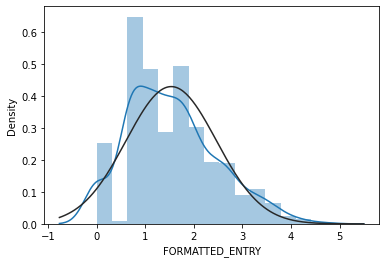

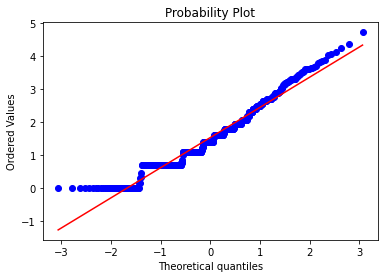

In [75]:
from scipy.stats import norm
from scipy import stats
import seaborn as sns

sns.distplot(result['FORMATTED_ENTRY'], fit=norm);
fig = plt.figure()
res = stats.probplot(result['FORMATTED_ENTRY'], plot=plt)

/opt/anaconda3/envs/gds/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


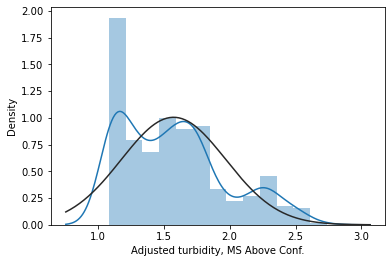

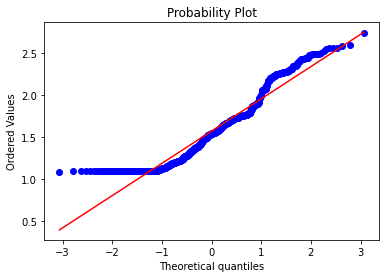

In [81]:
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import math

sns.distplot(np.sqrt(result['Adjusted turbidity, MS Above Conf.']), fit=norm);
fig = plt.figure()
res = stats.probplot(np.sqrt(result['Adjusted turbidity, MS Above Conf.']), plot=plt)

In [58]:
#performing transformations 

import math
import numpy as np
from scipy.stats import norm

result['FORMATTED_ENTRY'] = np.log(result['FORMATTED_ENTRY'])

result['Adjusted TOC, MS Above Conf.'] = np.log(result['Adjusted TOC, MS Above Conf.'])
result['Adjusted TP, MS Above Conf.'] = np.log(result['Adjusted TP, MS Above Conf.'])
result['Adjusted turbidity, MS Above Conf.'] = np.sqrt(result['Adjusted turbidity, MS Above Conf.'])

result['Adjusted TOC, NF Above Conf.'] = np.log(result['Adjusted TOC, NF Above Conf.'])
result['Adjusted TP, NF Above Conf.'] = np.log(result['Adjusted TP, NF Above Conf.'])
result['Adjusted turbidity, NF Above Conf.'] = np.log(result['Adjusted turbidity, NF Above Conf.'])

result['Adjusted TOC, Downstream Strontia'] = np.log(result['Adjusted TOC, Downstream Strontia'])
result['Adjusted TP, Downstream Strontia'] = np.sqrt(result['Adjusted TP, Downstream Strontia'])
result['Adjusted turbidity, Downstream Strontia'] = np.log(result['Adjusted turbidity, Downstream Strontia'])

result['Adjusted TOC, Upstream Strontia'] = np.sqrt(result['Adjusted TOC, Upstream Strontia'])
result['Adjusted TP, Upstream Strontia'] = np.log(result['Adjusted TP, Upstream Strontia'])
result['Adjusted turbidity, Upstream Strontia'] = np.sqrt(result['Adjusted turbidity, Upstream Strontia'])

result['Adjusted TOC, SP Below Chatfield'] = np.sqrt(result['Adjusted TOC, SP Below Chatfield'])
# dropping Adjusted TP below chatfield - transformation not really possible 
result['Adjusted turbidity, SP Below Chatfield'] = np.log(result['Adjusted turbidity, SP Below Chatfield'])

result['Waterton Gage (cfs)'] = 1 / (result['Waterton Gage (cfs)']) ** (1/3)
result['South Platte Above Cheesman Flowrate (cfs)'] = np.log(result['South Platte Above Cheesman Flowrate (cfs)'])
result['South Platte Below Cheesman Downstream (cfs) '] = np.log(result['South Platte Below Cheesman Downstream (cfs) '])
#no transformation on RT
result['Conduit 20 (with Chatfield flow) (cfs)'] = np.sqrt(result['Conduit 20 (with Chatfield flow) (cfs)'])
result['Conduit 20 to Marston Total (No Chatfield water) '] = np.sqrt(result['Conduit 20 to Marston Total (No Chatfield water) '])
result['Marston WTP Outflow (cfs)'] = np.sqrt(result['Marston WTP Outflow (cfs)'])
#no transformation on Marston H or L temperature
result['Strontia Springs Outflow (cfs)'] = np.log(result['Strontia Springs Outflow (cfs)'])

In [59]:
#dropping column from above
result = result.drop(columns = ['Adjusted TP, SP Below Chatfield'])

## Checking assumptions for multivariate linear regression

In [60]:
result

,"Adjusted TOC, MS Above Conf.","Adjusted TP, MS Above Conf.","Adjusted turbidity, MS Above Conf.","Adjusted TOC, NF Above Conf.","Adjusted TP, NF Above Conf.","Adjusted turbidity, NF Above Conf.","Adjusted TOC, Downstream Strontia","Adjusted TP, Downstream Strontia","Adjusted turbidity, Downstream Strontia","Adjusted TOC, Upstream Strontia",...,South Platte Above Cheesman Flowrate (cfs),South Platte Below Cheesman Downstream (cfs),Roberts Tunnel Flowrate (cfs),Conduit 20 to Marston Total (No Chatfield water),Conduit 20 (with Chatfield flow) (cfs),Marston WTP Outflow (cfs),Strontia Springs Outflow (cfs),"Marston Temperature, high (C)","Marston Temperature, low (C)",FORMATTED_ENTRY
Date,,,,,,,,,,,,,,,,,,,,,
7/2/2012,0.797507,0.037147,1.069700,1.332128,0.030173,0.531680,1.116682,1.008947,1.228539,2.142929,...,4.521789,5.703782,357.30000,12.078079,12.840561,11.325635,5.241959,35.555556,18.333333,3.284289
7/10/2012,0.854415,0.029384,0.877557,1.272052,0.029216,0.752757,0.965386,1.008663,1.189991,2.087156,...,5.433722,5.111988,90.70625,12.462744,13.203030,8.148006,5.320764,25.555556,15.000000,1.534714
7/18/2012,0.904218,0.023224,0.708585,1.136472,0.027344,1.180684,0.735613,1.008074,1.170379,1.954454,...,5.433722,5.805135,306.00000,10.185774,11.079260,9.733961,5.060504,30.555556,15.000000,3.203965
7/25/2012,0.951658,0.018893,0.580289,0.998140,0.025616,1.510217,0.566773,1.007932,1.166823,1.821764,...,5.517453,5.616771,306.00000,11.391225,12.196721,11.325635,5.450137,33.333333,17.777778,4.137723
7/25/2012,0.951658,0.018893,0.580289,0.998140,0.025616,1.510217,0.566773,1.007932,1.166823,1.821764,...,5.517453,5.616771,306.00000,11.391225,12.196721,11.325635,5.450137,33.333333,17.777778,1.623341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6/7/2022,1.246188,0.018470,1.013100,0.892608,0.017319,1.835842,1.284129,1.006486,1.596264,1.628367,...,5.257495,4.183576,146.18750,7.511325,7.511325,7.172168,5.176150,25.000000,11.666667,1.386294
6/7/2022,1.246188,0.018470,1.013100,0.892608,0.017319,1.835842,1.284129,1.006486,1.596264,1.628367,...,5.257495,4.183576,146.18750,7.511325,7.511325,7.172168,5.176150,25.000000,11.666667,1.098612
6/14/2022,1.221969,0.019868,1.218145,0.962256,0.016730,1.898145,1.164937,1.007127,1.497788,1.665897,...,5.087596,4.135167,172.33330,9.516302,9.516302,8.021845,5.402677,35.000000,12.777778,1.098612


/var/folders/fv/w_4_6lgj0pg873rfkcnj0z7c0000gn/T/ipykernel_2409/2310993591.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


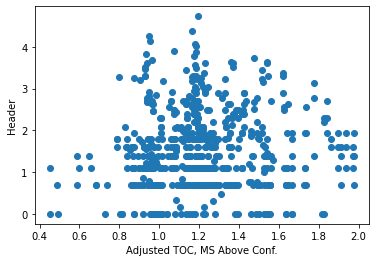

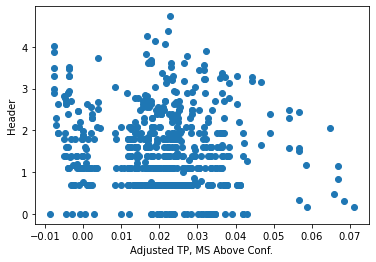

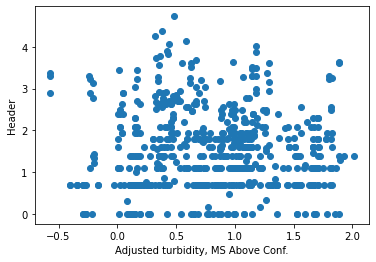

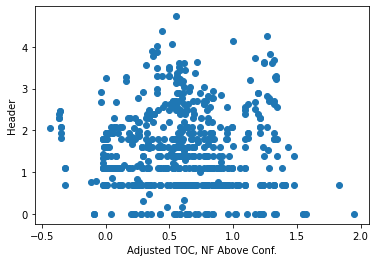

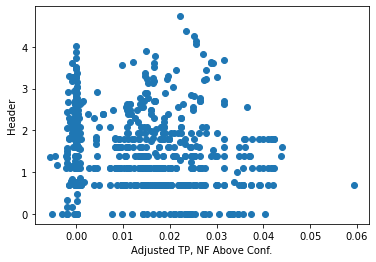

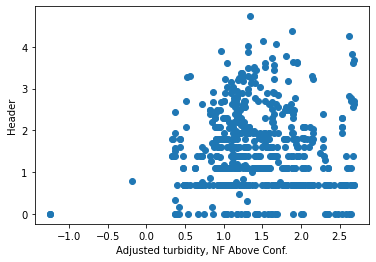

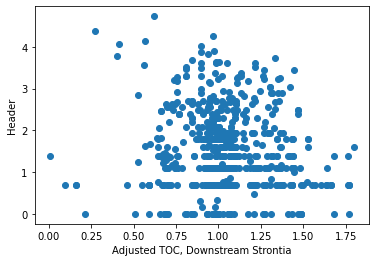

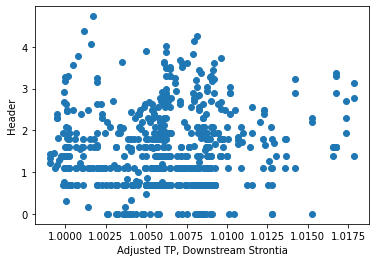

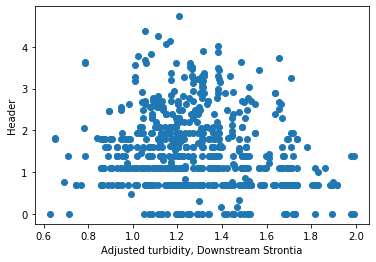

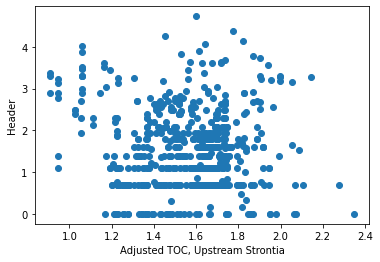

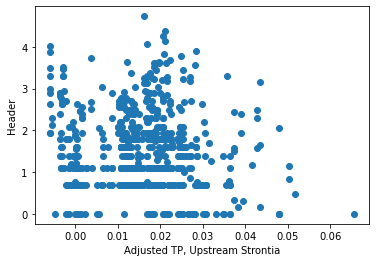

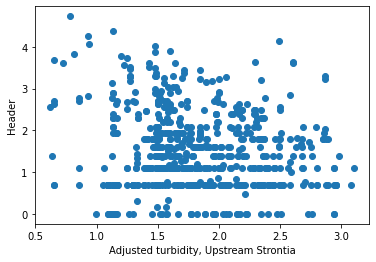

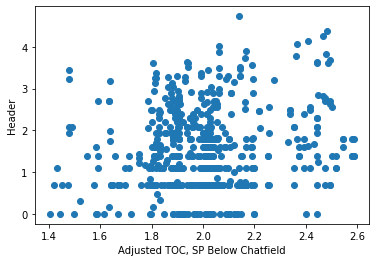

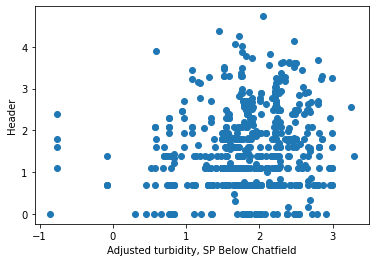

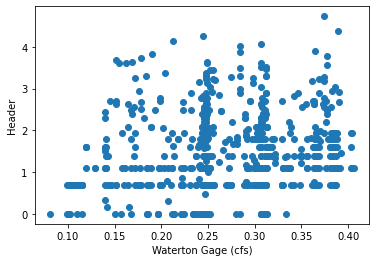

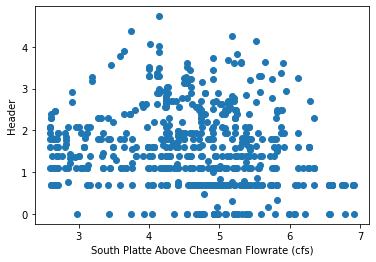

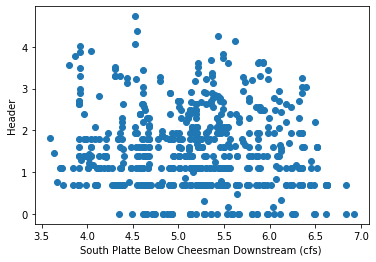

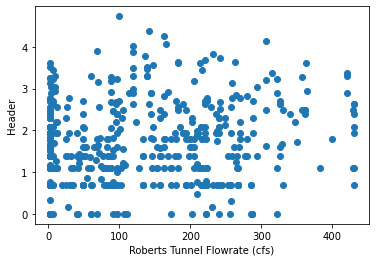

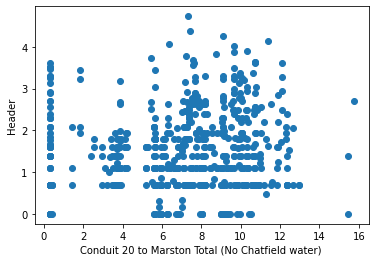

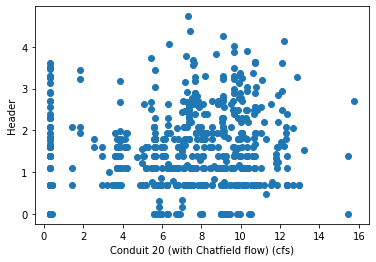

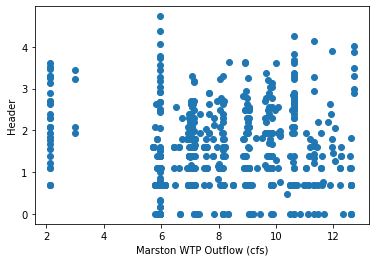

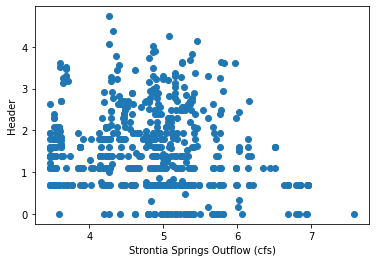

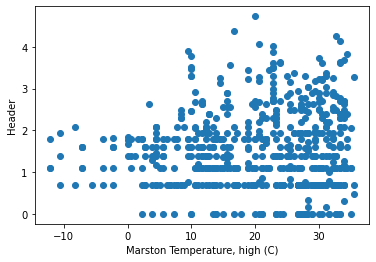

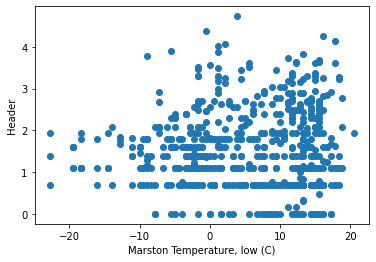

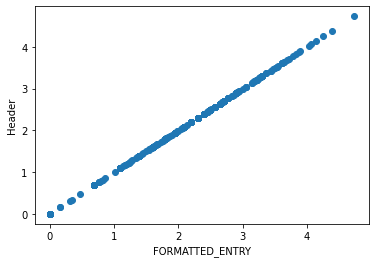

In [61]:
from scipy import stats
from statsmodels.compat import lzip
import statsmodels
import seaborn as sns

#linear relationship
#sns.set(style = 'darkgrid')

#sns.relplot(x ="", y ="CO2EMISSIONS", data = dataset);

for i, col in enumerate(result.columns):
    # create scatterplot
    plt.figure()
    plt.scatter(x=result[col], y=result['FORMATTED_ENTRY'],)
    plt.xlabel(col)
    plt.ylabel('Header')

## AIC and multivariate linear regression development

In [79]:
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

x = result[['Adjusted TOC, MS Above Conf.',
 'Adjusted TP, MS Above Conf.',
 'Adjusted turbidity, MS Above Conf.',
 'Adjusted TOC, NF Above Conf.',
 'Adjusted TP, NF Above Conf.',
 'Adjusted turbidity, NF Above Conf.',
 'Adjusted TOC, Downstream Strontia',
 'Adjusted TP, Downstream Strontia',
 'Adjusted turbidity, Downstream Strontia',
 'Adjusted TOC, Upstream Strontia',
 'Adjusted TP, Upstream Strontia',
 'Adjusted turbidity, Upstream Strontia',
 'Adjusted TOC, SP Below Chatfield',
 #'Adjusted TP, SP Below Chatfield',
 'Adjusted turbidity, SP Below Chatfield',
 'Waterton Gage (cfs)',
 'South Platte Above Cheesman Flowrate (cfs)',
 'South Platte Below Cheesman Downstream (cfs) ',
 'Roberts Tunnel Flowrate (cfs)',
 'Conduit 20 to Marston Total (No Chatfield water) ',
 'Conduit 20 (with Chatfield flow) (cfs)',
 'Marston WTP Outflow (cfs)',
 'Marston Temperature, high (C)',
 'Strontia Springs Outflow (cfs)',
 'Marston Temperature, low (C)',
 #'FORMATTED_ENTRY'
 ]]

x = StandardScaler().fit_transform(x)

y = result[['FORMATTED_ENTRY']]

#with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

KeyError: "['Adjusted TOC, MS Above Conf.'] not in index"

In [63]:
result.isnull().any()

Adjusted TOC, MS Above Conf.                         False
Adjusted TP, MS Above Conf.                          False
Adjusted turbidity, MS Above Conf.                   False
Adjusted TOC, NF Above Conf.                         False
Adjusted TP, NF Above Conf.                          False
Adjusted turbidity, NF Above Conf.                   False
Adjusted TOC, Downstream Strontia                    False
Adjusted TP, Downstream Strontia                     False
Adjusted turbidity, Downstream Strontia              False
Adjusted TOC, Upstream Strontia                      False
Adjusted TP, Upstream Strontia                       False
Adjusted turbidity, Upstream Strontia                False
Adjusted TOC, SP Below Chatfield                     False
Adjusted turbidity, SP Below Chatfield               False
Waterton Gage (cfs)                                  False
South Platte Above Cheesman Flowrate (cfs)           False
South Platte Below Cheesman Downstream (cfs)         Fal

In [64]:
nan_in_col  = result[result['Adjusted turbidity, NF Above Conf.'].isna()]
nan_in_col

,"Adjusted TOC, MS Above Conf.","Adjusted TP, MS Above Conf.","Adjusted turbidity, MS Above Conf.","Adjusted TOC, NF Above Conf.","Adjusted TP, NF Above Conf.","Adjusted turbidity, NF Above Conf.","Adjusted TOC, Downstream Strontia","Adjusted TP, Downstream Strontia","Adjusted turbidity, Downstream Strontia","Adjusted TOC, Upstream Strontia",...,South Platte Above Cheesman Flowrate (cfs),South Platte Below Cheesman Downstream (cfs),Roberts Tunnel Flowrate (cfs),Conduit 20 to Marston Total (No Chatfield water),Conduit 20 (with Chatfield flow) (cfs),Marston WTP Outflow (cfs),Strontia Springs Outflow (cfs),"Marston Temperature, high (C)","Marston Temperature, low (C)",FORMATTED_ENTRY
Date,,,,,,,,,,,,,,,,,,,,,


In [65]:
nan_in_col_2  = result[result['Adjusted turbidity, SP Below Chatfield'].isna()]
nan_in_col_2

,"Adjusted TOC, MS Above Conf.","Adjusted TP, MS Above Conf.","Adjusted turbidity, MS Above Conf.","Adjusted TOC, NF Above Conf.","Adjusted TP, NF Above Conf.","Adjusted turbidity, NF Above Conf.","Adjusted TOC, Downstream Strontia","Adjusted TP, Downstream Strontia","Adjusted turbidity, Downstream Strontia","Adjusted TOC, Upstream Strontia",...,South Platte Above Cheesman Flowrate (cfs),South Platte Below Cheesman Downstream (cfs),Roberts Tunnel Flowrate (cfs),Conduit 20 to Marston Total (No Chatfield water),Conduit 20 (with Chatfield flow) (cfs),Marston WTP Outflow (cfs),Strontia Springs Outflow (cfs),"Marston Temperature, high (C)","Marston Temperature, low (C)",FORMATTED_ENTRY
Date,,,,,,,,,,,,,,,,,,,,,


In [66]:
#dataframe of significant results
result_sig = result[['Strontia Springs Outflow (cfs)','Adjusted turbidity, Upstream Strontia','Marston WTP Outflow (cfs)','Adjusted TP, MS Above Conf.','Roberts Tunnel Flowrate (cfs)','Adjusted TOC, SP Below Chatfield','South Platte Above Cheesman Flowrate (cfs)','Adjusted turbidity, SP Below Chatfield','Adjusted turbidity, NF Above Conf.','Adjusted TP, Downstream Strontia','Adjusted TOC, NF Above Conf.','Adjusted TP, NF Above Conf.','Adjusted turbidity, MS Above Conf.','FORMATTED_ENTRY']]

In [67]:
result_sig.to_csv('significant_results_data.csv', index = True)

### Importance testing using rfpipe package (MIT)

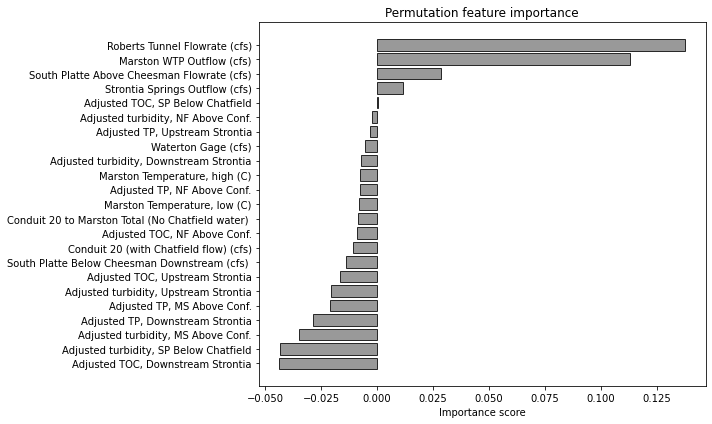

In [69]:
#testing and training data
import rfpimp
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

features_imp = [#'Adjusted TOC, MS Above Conf.',
 'Adjusted TP, MS Above Conf.',
 'Adjusted turbidity, MS Above Conf.',
 'Adjusted TOC, NF Above Conf.',
 'Adjusted TP, NF Above Conf.',
 'Adjusted turbidity, NF Above Conf.',
 'Adjusted TOC, Downstream Strontia',
 'Adjusted TP, Downstream Strontia',
 'Adjusted turbidity, Downstream Strontia',
 'Adjusted TOC, Upstream Strontia',
 'Adjusted TP, Upstream Strontia',
 'Adjusted turbidity, Upstream Strontia',
 'Adjusted TOC, SP Below Chatfield',
 #'Adjusted TP, SP Below Chatfield',
 'Adjusted turbidity, SP Below Chatfield',
 'Waterton Gage (cfs)',
 'South Platte Above Cheesman Flowrate (cfs)',
 'South Platte Below Cheesman Downstream (cfs) ',
 'Roberts Tunnel Flowrate (cfs)',
 'Conduit 20 to Marston Total (No Chatfield water) ',
 'Conduit 20 (with Chatfield flow) (cfs)',
 'Marston WTP Outflow (cfs)',
 'Strontia Springs Outflow (cfs)',
 'Marston Temperature, high (C)',
 'Marston Temperature, low (C)',
 'FORMATTED_ENTRY'
 ]

result_train, result_test = train_test_split(result, test_size=0.20, random_state= 42)
result_train = result_train[features_imp]
result_test = result_test[features_imp]

X_train, y_train = result_train.drop('FORMATTED_ENTRY',axis=1), result_train['FORMATTED_ENTRY']
X_test, y_test = result_test.drop('FORMATTED_ENTRY',axis=1), result_test['FORMATTED_ENTRY']

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

#permutation feature importance
imp = rfpimp.importances(rf, X_test, y_test)

fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Permutation feature importance')
#ax.text(0.8, 0.15, 'aegis4048.github.io', fontsize=12, ha='center', va='center',
#        transform=ax.transAxes, color='grey', alpha=0.5)
plt.gca().invert_yaxis()

fig.tight_layout()

/var/folders/fv/w_4_6lgj0pg873rfkcnj0z7c0000gn/T/ipykernel_2409/2742217772.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


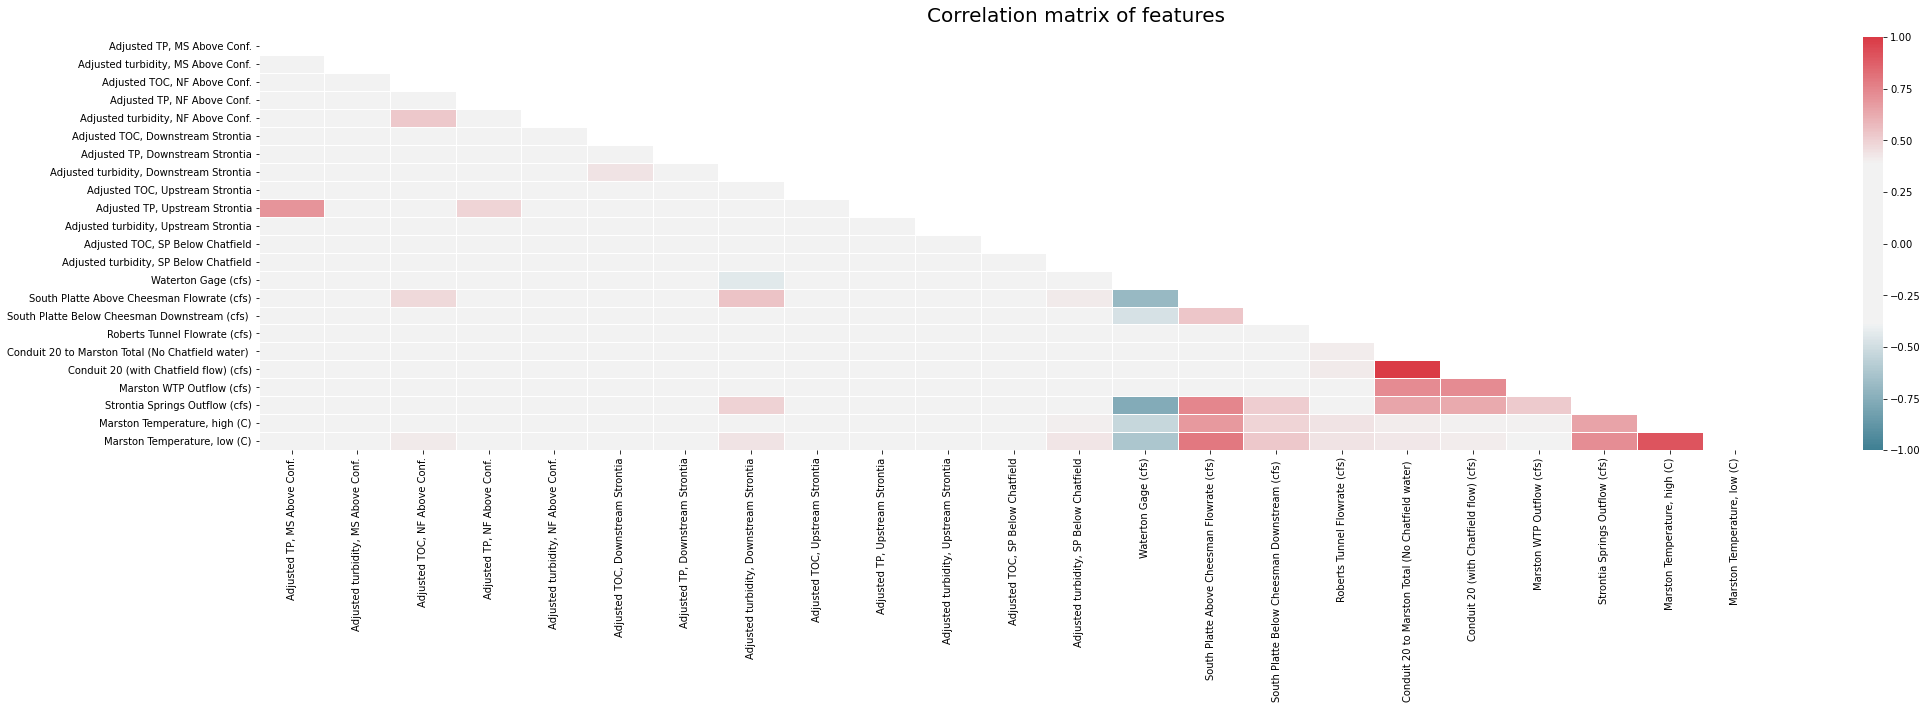

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns

result = result.iloc[:, 1:-1]

corr = result.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(30, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

fig.suptitle('Correlation matrix of features', fontsize=20)
#ax.text(0.77, 0.2, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#         transform=ax.transAxes, color='grey', alpha=0.5)

fig.tight_layout()

Feature 0: 11.888033
Feature 1: 1.817726
Feature 2: 1.078698
Feature 3: 12.377501
Feature 4: 1.749557
Feature 5: 6.371900
Feature 6: 4.421550
Feature 7: 18.084967
Feature 8: 1.362839
Feature 9: 9.915620
Feature 10: 11.846358
Feature 11: 16.785798
Feature 12: 3.094751
Feature 13: 17.673503
Feature 14: 11.584423
Feature 15: 3.845898
Feature 16: 38.188445
Feature 17: 5.536806
Feature 18: 5.444022
Feature 19: 0.000425
Feature 20: 8.099535
Feature 21: 1.196518
Feature 22: 0.095762


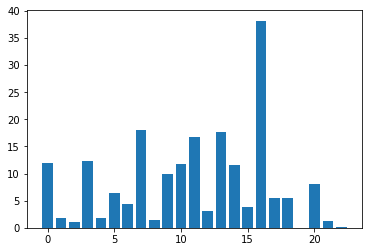

In [71]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [72]:
# evaluation of a model using 10 features chosen with correlation
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_regression, k=8)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.562


In [73]:
from random import random
from sklearn.model_selection import train_test_split as tts

X_train_ac, X_test_ac, y_train_ac, y_test_ac = tts(result_train.drop('FORMATTED_ENTRY', axis = 1),stats.boxcox(result_train['FORMATTED_ENTRY'], lmbda = 0), test_size = 0.2, random_state = 42)

Linreg1 = LinearRegression()
Linreg1.fit(X_train_ac, y_train_ac)
Linreg1.score(X_test_ac,y_test_ac)

ValueError: Data must be positive.

In [74]:
#AIC development
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict

#comparison - calculating both AIC and AICc
def aic(n,mse, num_params):
    aic = n * np.log(mse) + (2 * num_params)
    aic_c = aic + (2 * num_params * (num_params + 1))/ (n - num_params - 1)
    return (aic, aic_c)


#comparison of the aic and aic_c values - using to prevent overfitting of the model

#defined from above, we have (x) and (y)
#x = x_names
#y = geosmin concentrations (FORMATTED_ENTRY)
pcr1 = make_pipeline(PCA(n_components = 5), LinearRegression())
pcr2 = make_pipeline(PCA(n_components = 10), LinearRegression())

#Cross-validation
y_cv1 = cross_val_predict(pcr1, x, y, cv=10)
y_cv2 = cross_val_predict(pcr2, x, y, cv=10)
 
# Calculate MSE
mse1 = mean_squared_error(y, y_cv1)
mse2 = mean_squared_error(y, y_cv2)
 
# Compute AIC
aic1, aicc1 = aic(x.shape[0], mse1, pcr1.steps[0][1].n_components+1)
aic2, aicc2 = aic(x.shape[0], mse2, pcr2.steps[0][1].n_components+1)
 
# Print data
print("AIC, model 1:", aic1)
print("AICc, model 1:", aicc1)
print("AIC, model 2:", aic2)
print("AICc, model 2:", aicc2)


AIC, model 1: -56.30581277223128
AICc, model 1: -56.172479438897945
AIC, model 2: -30.866794885383506
AICc, model 2: -30.444394885383506


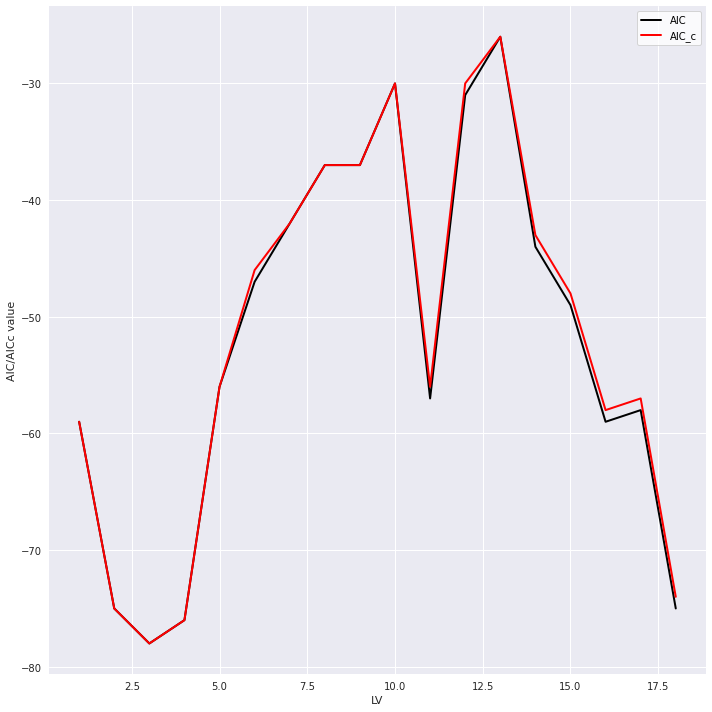

In [69]:
#based on graph below, it seems like optimal LV (variable) value for fitting the model to Geosmin ratings would be 8

import matplotlib.pyplot as plt
import pandas as pd

ncomponents = np.arange(1,19,1)
AIC = np.zeros_like(ncomponents)
AIC_c = np.zeros_like(ncomponents)
for i, nc in enumerate(ncomponents):

    pcr = make_pipeline(PCA(n_components = nc), LinearRegression())
    y_cv = cross_val_predict(pcr, x, y, cv = 10) #common to use cv = 10

    mserror = mean_squared_error(y, y_cv)
    AIC[i], AIC_c[i] = aic(x.shape[0], mserror, pcr.steps[0][1].n_components + 1)

plt.figure(figsize = (10,10))
with plt.style.context(('seaborn')):
    plt.plot(ncomponents, AIC, 'k', lw=2, label="AIC")
    plt.plot(ncomponents,AIC_c, 'r', lw=2, label="AIC_c")

plt.xlabel("LV")
plt.ylabel("AIC/AICc value")
plt.tight_layout()
plt.legend()
plt.show()